In [2]:
pip install torch

     |████████████████████████████████| 619.9 MB 7.4 kB/s  eta 0:00:013| 300.7 MB 123.3 MB/s eta 0:00:03
     |████████████████████████████████| 63.2 MB 105.9 MB/s eta 0:00:01
  Using cached nvidia_cufft_cu11-10.9.0.58-py3-none-manylinux1_x86_64.whl (168.4 MB)
  Using cached nvidia_cusparse_cu11-11.7.4.91-py3-none-manylinux1_x86_64.whl (173.2 MB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_curand_cu11-10.2.10.91-py3-none-manylinux1_x86_64.whl (54.6 MB)
  Using cached nvidia_nvtx_cu11-11.7.91-py3-none-manylinux1_x86_64.whl (98 kB)
  Using cached nvidia_cusolver_cu11-11.4.0.1-2-py3-none-manylinux1_x86_64.whl (102.6 MB)
  Using cached nvidia_nccl_cu11-2.14.3-py3-none-manylinux1_x86_64.whl (177.1 MB)
  Using cached nvidia_cuda_cupti_cu11-11.7.101-py3-none-manylinux1_x86_64.whl (11.8 MB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-non

In [4]:
pip install torchvision

     |████████████████████████████████| 33.8 MB 143 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torch.utils.data.dataloader import default_collate
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
#from helpers import visualize
%matplotlib inline

In [6]:
def visualize(input_arr,labels,num_imgs=9):
    plot_size=int(np.ceil(num_imgs/4))
    fig = plt.figure(figsize=(12,12))
    if len(input_arr.shape)==4:
        num_imgs=input_arr.shape[0]
    else:
        num_imgs=1
        input_arr=np.expand_dims(input_arr,axis=0)
        labels=[labels]
    for i in range(num_imgs):
      plt.subplot(4,plot_size,i+1)
      plt.tight_layout()
      img = input_arr[i]

      img = np.rollaxis(img,0,3)
      plt.imshow(img, interpolation='none')
      plt.title("class_label: {}".format(labels[i]))
      plt.xticks([])
      plt.yticks([])

In [7]:
class DatasetLoader(Dataset):
    """ Dataset Class Wrapper """

    def __init__(self, root_path, data_dir, annotation_file,data_type='train', \
                 data_transform=None,label_transform=None):
        """
        Args:
            root_path (string):  the parent folder path
            annotation_file (string):  csv/txt file which has the 
                                        dataset labels
            data_type(string): the type of data-train,val,test
            data_transform: The trasforms to apply to data
            label_transform: The transforms to apply to label

        """
        
        self.data_path = os.path.join(root_path,data_dir,data_type)
        self.label_path = os.path.join(root_path,annotation_file)
        self.data_transform = data_transform
        self._load_data()

    def _load_data(self):
        '''
        function to load the data in the format of [[img_name_1,label_1],
        [img_name_2,label_2],.....[img_name_n,label_n]]
        '''
        self.labels = pd.read_csv(self.label_path)
        
        self.loaded_data = []
        for i in range(self.labels.shape[0]):
            img_name = os.path.join(self.data_path, self.labels['img_names'][i])
            label = self.labels['labels'][i]
            img = Image.open(img_name)
            img_ = self.data_transform(img)
            self.loaded_data.append((img_,label))

    def __len__(self):
        return len(self.loaded_data)

    def __getitem__(self, idx):

        idx = idx % len(self.loaded_data)
       
        img,label = self.loaded_data[idx]        
        return img,label

In [19]:
root_path=r'/home/shubhamp/Downloads/dataloadersPyTorch'
data_dir='/home/shubhamp/Downloads/dataloadersPyTorch/dogsvscatDataset'
annotation_file='/home/shubhamp/Downloads/dataloadersPyTorch/train_labels_mini.csv'

**No Augmentation**

In [9]:
# no transformation
transform_tr=transforms.Compose([transforms.Resize((128,128)),
                                        transforms.ToTensor()])
transform_te=transforms.Compose([transforms.Resize((128,128)),
                                        transforms.ToTensor()])

In [20]:
training_dataset=DatasetLoader(root_path,data_dir,annotation_file,data_type='train',\
                          data_transform=transform_tr)
print('length of dataset: ', len(training_dataset))

length of dataset:  400


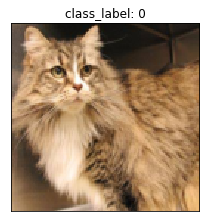

In [31]:
img,label=training_dataset[100]
visualize(img.numpy(),label,num_imgs=1)

In [32]:
train_dataloader = DataLoader(training_dataset, batch_size=12, shuffle=True)

In [33]:
data,label=next(iter(train_dataloader))

In [34]:
data.shape

torch.Size([12, 3, 128, 128])

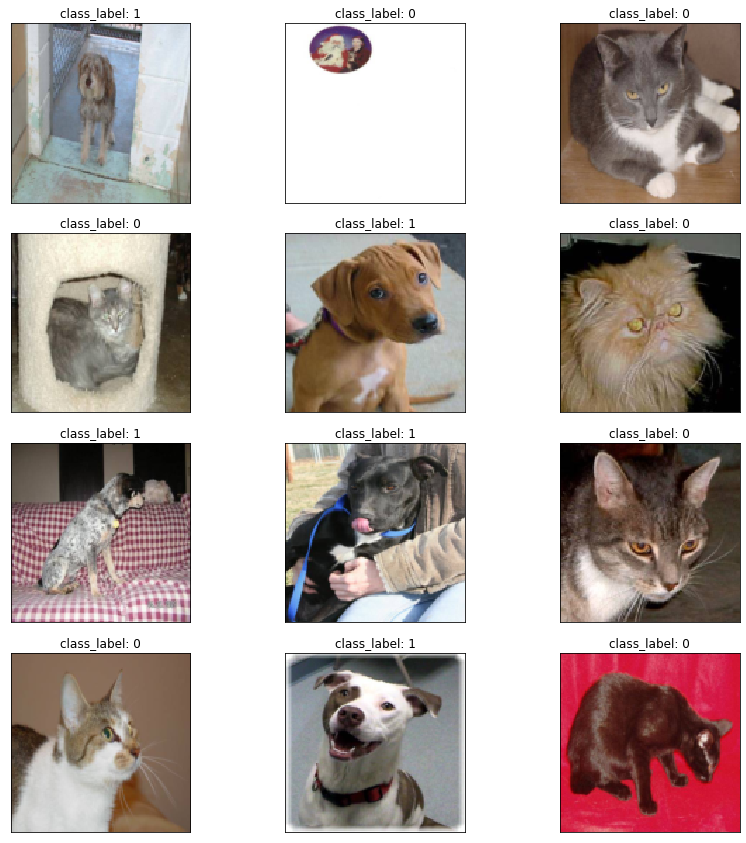

In [35]:
visualize(data.numpy(),label,num_imgs=12)

**SINGLE TRANSFORMATION**

In [36]:
t1=transforms.RandomPerspective(distortion_scale=0.5, p=1.0)
transform_tr=transforms.Compose([transforms.Resize((128,128)),
                                        transforms.ToTensor(),t1])
transform_te=transforms.Compose([transforms.Resize((128,128)),
                                        transforms.ToTensor()])

In [37]:
training_dataset=DatasetLoader(root_path,data_dir,annotation_file,data_type='train',\
                          data_transform=transform_tr)
print('length of dataset: ', len(training_dataset))

length of dataset:  400


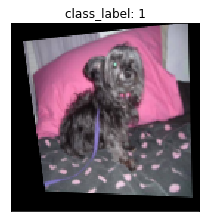

In [39]:
img,label=training_dataset[1000]
visualize(img.numpy(),label,num_imgs=1)

In [40]:
train_dataloader = DataLoader(training_dataset, batch_size=12, shuffle=True)


In [41]:
data,label=next(iter(train_dataloader))

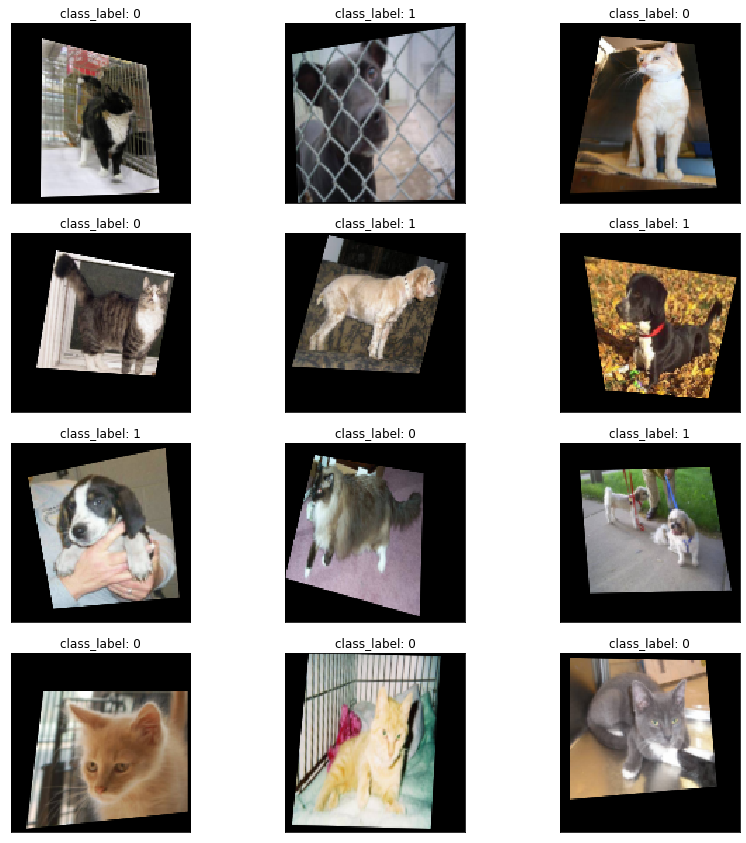

In [42]:
visualize(data.numpy(),label,num_imgs=12)

**TRANSFORMATION COMPOSE**

In [44]:
t1=transforms.RandomPerspective(distortion_scale=0.4, p=1.0)
t2=transforms.RandomCrop(96)
transform_tr=transforms.Compose([transforms.Resize((128,128)),
                                        transforms.ToTensor(),t2,t1])


In [45]:
training_dataset=DatasetLoader(root_path,data_dir,annotation_file,data_type='train',\
                          data_transform=transform_tr)
print('length of dataset: ', len(training_dataset))

length of dataset:  400


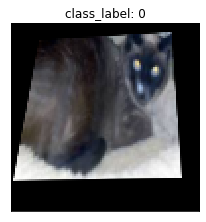

In [46]:
img,label=training_dataset[10]
visualize(img.numpy(),label,num_imgs=1)

In [47]:
train_dataloader = DataLoader(training_dataset, batch_size=20, shuffle=True)

In [48]:
data,label=next(iter(train_dataloader))

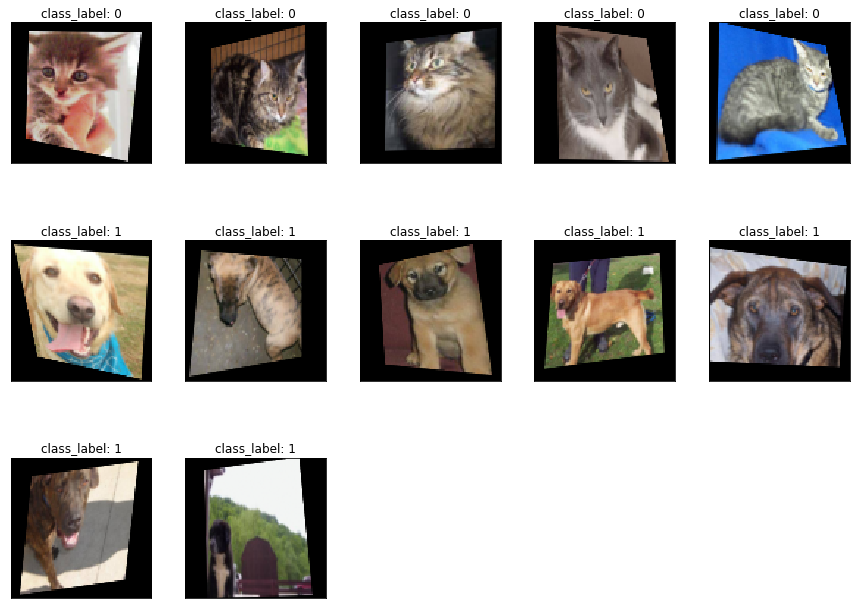

In [49]:
visualize(data.numpy(),label,num_imgs=20)